<a href="https://colab.research.google.com/github/Jameelcodes/Jameelcodes-Folder/blob/master/LagosFloodPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
df= pd.read_csv('/content/lagos_rain_data_2002_to_2024.csv')
print('Data successfully read!')

Data successfully read!


In [ ]:
df.head()

,Name,Datetime,Tempmax,Tempmin,Temp,Humidity,Precip,Preciprob,Precipcover,preciptype,Windspeed,Winddir,Sealevelpressure,Cloudcover,Severrisk,Moonphase
0,Lagos,06/01/2002,29.6,26.1,27.2,86.5,1.5,100,8.33,rain,22.3,179.1,1010.2,90.0,NaN,0.75
1,Lagos,17/02/2002,28.6,26.1,27.8,83.4,39.9,100,4.17,rain,18.4,192.4,1010.9,90.0,NaN,0.17
2,Lagos,22/04/2002,25.1,25.1,25.1,95.9,0.7,100,4.17,rain,0.0,NaN,1009.6,90.0,NaN,0.34
3,Lagos,04/05/2002,29.1,27.1,27.8,87.9,3.0,100,4.17,rain,9.4,310.0,1009.4,90.0,NaN,0.75
4,Lagos,19/05/2002,32.1,27.1,29.2,84.5,0.7,100,4.17,rain,14.8,220.0,1010.1,90.0,NaN,0.25


In [ ]:
df.columns

Index(['Name', 'Datetime', 'Tempmax', 'Tempmin', 'Temp', 'Humidity', 'Precip',
       'Preciprob', 'Precipcover', 'preciptype', 'Windspeed', 'Winddir',
       'Sealevelpressure', 'Cloudcover', 'Severrisk', 'Moonphase'],
      dtype='object')

In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d/%m/%Y', errors='coerce')

In [ ]:
df['day'] = df['Datetime'].dt.day
df['month'] = df['Datetime'].dt.month
df['year'] = df['Datetime'].dt.year

In [ ]:
df.head()

,Name,Datetime,Tempmax,Tempmin,Temp,Humidity,Precip,Preciprob,Precipcover,preciptype,Windspeed,Winddir,Sealevelpressure,Cloudcover,Severrisk,Moonphase,day,month,year
0,Lagos,2002-01-06,29.6,26.1,27.2,86.5,1.5,100,8.33,rain,22.3,179.1,1010.2,90.0,NaN,0.75,6.0,1.0,2002.0
1,Lagos,2002-02-17,28.6,26.1,27.8,83.4,39.9,100,4.17,rain,18.4,192.4,1010.9,90.0,NaN,0.17,17.0,2.0,2002.0
2,Lagos,2002-04-22,25.1,25.1,25.1,95.9,0.7,100,4.17,rain,0.0,NaN,1009.6,90.0,NaN,0.34,22.0,4.0,2002.0
3,Lagos,2002-05-04,29.1,27.1,27.8,87.9,3.0,100,4.17,rain,9.4,310.0,1009.4,90.0,NaN,0.75,4.0,5.0,2002.0
4,Lagos,2002-05-19,32.1,27.1,29.2,84.5,0.7,100,4.17,rain,14.8,220.0,1010.1,90.0,NaN,0.25,19.0,5.0,2002.0


In [ ]:
df.shape

(3736, 19)

In [ ]:
df.isnull().sum()

Name                   0
Datetime             128
Tempmax                0
Tempmin                0
Temp                   0
Humidity               0
Precip                 0
Preciprob              0
Precipcover            0
preciptype             0
Windspeed            106
Winddir              108
Sealevelpressure      57
Cloudcover             0
Severrisk           2743
Moonphase            106
day                  128
month                128
year                 128
dtype: int64

In [ ]:
lagos_data = df.copy()

In [ ]:
lagos_data.shape

(3736, 19)

In [ ]:
# Heavy Rainfall threshold (50.mm a day)
heavy_rainfall_threshold = 50.0

#Filter data to find days with precipitation above threshold
df = df[df['Precip'] > heavy_rainfall_threshold].reset_index()

df.head()

,index,Name,Datetime,Tempmax,Tempmin,Temp,Humidity,Precip,Preciprob,Precipcover,preciptype,Windspeed,Winddir,Sealevelpressure,Cloudcover,Severrisk,Moonphase,day,month,year
0,9,Lagos,2002-06-06,28.1,21.1,23.8,95.5,78.0,100,8.33,rain,37.1,127.1,1012.0,90.0,NaN,0.85,6.0,6.0,2002.0
1,10,Lagos,2002-06-10,30.1,23.1,25.6,93.7,65.7,100,8.33,rain,18.4,347.0,1011.9,90.0,NaN,0.98,10.0,6.0,2002.0
2,18,Lagos,2002-06-24,26.1,23.4,25.1,97.7,52.9,100,8.33,rain,13.0,224.4,1013.6,90.9,NaN,0.50,24.0,6.0,2002.0
3,28,Lagos,2002-07-12,29.1,22.6,25.9,90.5,72.1,100,8.33,rain,27.7,209.8,1012.7,90.0,NaN,0.07,12.0,7.0,2002.0
4,32,Lagos,2002-07-16,25.6,24.1,25.0,97.7,75.9,100,8.33,rain,27.7,216.4,1012.7,90.0,NaN,0.22,16.0,7.0,2002.0


In [ ]:
df.shape

(175, 20)

In [ ]:
df.drop('index', axis=1, inplace=True)

In [ ]:
df.columns

Index(['Name', 'Datetime', 'Tempmax', 'Tempmin', 'Temp', 'Humidity', 'Precip',
       'Preciprob', 'Precipcover', 'preciptype', 'Windspeed', 'Winddir',
       'Sealevelpressure', 'Cloudcover', 'Severrisk', 'Moonphase', 'day',
       'month', 'year'],
      dtype='object')

In [ ]:
# viz_df = df[['datetime', 'tempmax', 'tempmin', 'temp','precip', 'precipprob',
#        'precipcover', 'preciptype', 'moonphase', 'conditions', 'description', 'icon', 'day', 'month', 'year']]

In [ ]:
sorted_df = df.copy()

In [ ]:
df.isnull().sum()

Name                  0
Datetime              4
Tempmax               0
Tempmin               0
Temp                  0
Humidity              0
Precip                0
Preciprob             0
Precipcover           0
preciptype            0
Windspeed            13
Winddir              14
Sealevelpressure      0
Cloudcover            0
Severrisk           141
Moonphase            13
day                   4
month                 4
year                  4
dtype: int64

In [ ]:
df['year'].unique()

array([2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,   nan,
       2019., 2020., 2021., 2022., 2023., 2024.])

In [ ]:
df.shape

(175, 19)

In [ ]:
# sorted_df = sorted_df.dropna(axis=0)

In [ ]:
# sorted_df.head()

In [ ]:
# sorted_df[['day', 'month', 'year']] = sorted_df[['day', 'month', 'year']].astype(int)

In [ ]:
df.head()

,Name,Datetime,Tempmax,Tempmin,Temp,Humidity,Precip,Preciprob,Precipcover,preciptype,Windspeed,Winddir,Sealevelpressure,Cloudcover,Severrisk,Moonphase,day,month,year
0,Lagos,2002-06-06,28.1,21.1,23.8,95.5,78.0,100,8.33,rain,37.1,127.1,1012.0,90.0,NaN,0.85,6.0,6.0,2002.0
1,Lagos,2002-06-10,30.1,23.1,25.6,93.7,65.7,100,8.33,rain,18.4,347.0,1011.9,90.0,NaN,0.98,10.0,6.0,2002.0
2,Lagos,2002-06-24,26.1,23.4,25.1,97.7,52.9,100,8.33,rain,13.0,224.4,1013.6,90.9,NaN,0.50,24.0,6.0,2002.0
3,Lagos,2002-07-12,29.1,22.6,25.9,90.5,72.1,100,8.33,rain,27.7,209.8,1012.7,90.0,NaN,0.07,12.0,7.0,2002.0
4,Lagos,2002-07-16,25.6,24.1,25.0,97.7,75.9,100,8.33,rain,27.7,216.4,1012.7,90.0,NaN,0.22,16.0,7.0,2002.0


In [ ]:
df.columns

Index(['Name', 'Datetime', 'Tempmax', 'Tempmin', 'Temp', 'Humidity', 'Precip',
       'Preciprob', 'Precipcover', 'preciptype', 'Windspeed', 'Winddir',
       'Sealevelpressure', 'Cloudcover', 'Severrisk', 'Moonphase', 'day',
       'month', 'year'],
      dtype='object')

In [ ]:
viz_df = df[['Datetime', 'Tempmax', 'Tempmin', 'Temp','Precip','Moonphase', 'Preciprob', 'day', 'month', 'year']]

In [ ]:
prem = viz_df.groupby('year')['Precip'].mean().reset_index()

In [ ]:
fig = px.line(prem, x='year', y='Precip',
              title='Average Yearly Precipitation (mm)')
fig.update_layout(xaxis_title='Year',  yaxis_title='Precipitation (mm)', width=1000, height=700)
fig.show()

In [ ]:
df.year.unique()

array([2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,   nan,
       2019., 2020., 2021., 2022., 2023., 2024.])

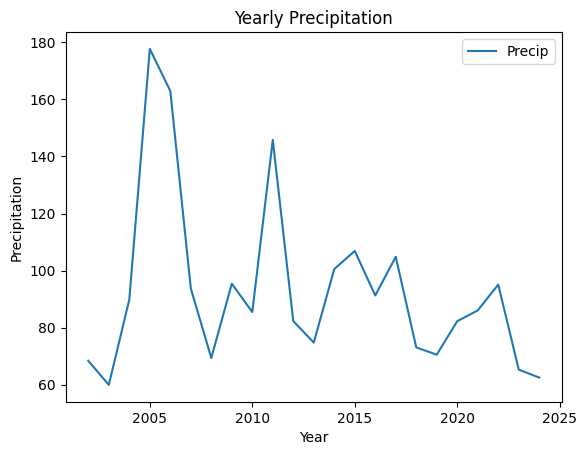

In [ ]:
prem.plot(kind='line', x='year', y='Precip')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.title('Yearly Precipitation')
plt.show()

In [ ]:
viz_df.isnull().sum()

Datetime      4
Tempmax       0
Tempmin       0
Temp          0
Precip        0
Moonphase    13
Preciprob     0
day           4
month         4
year          4
dtype: int64

In [ ]:
df.year.unique()

array([2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,   nan,
       2019., 2020., 2021., 2022., 2023., 2024.])

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
 viz_df.dropna(inplace=True)

<ipython-input-64-54e8b24fb4a8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
viz_df.head()

,Datetime,Tempmax,Tempmin,Temp,Precip,Moonphase,Preciprob,day,month,year
0,2002-06-06,28.1,21.1,23.8,78.0,0.85,100,6.0,6.0,2002.0
1,2002-06-10,30.1,23.1,25.6,65.7,0.98,100,10.0,6.0,2002.0
2,2002-06-24,26.1,23.4,25.1,52.9,0.50,100,24.0,6.0,2002.0
3,2002-07-12,29.1,22.6,25.9,72.1,0.07,100,12.0,7.0,2002.0
4,2002-07-16,25.6,24.1,25.0,75.9,0.22,100,16.0,7.0,2002.0


In [ ]:
viz_df.shape

(158, 10)

In [ ]:
# viz_df[['day', 'month','year']] = viz_df[['day', 'month','year']].astype(int)

In [ ]:
dape= df.groupby('day')['Precip'].mean().reset_index()

<Axes: xlabel='day'>

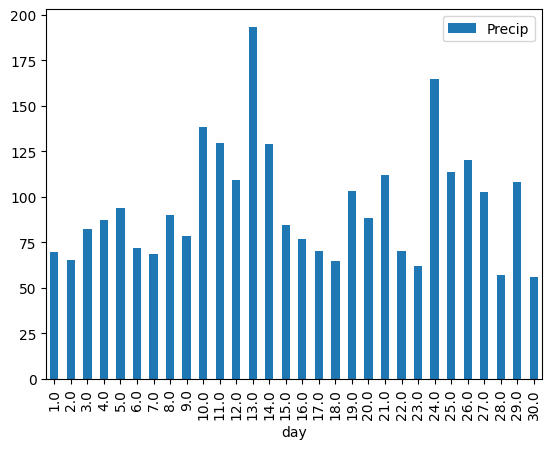

In [ ]:
dape.plot(kind='bar', x='day', y='Precip')

In [ ]:
mopr = df.groupby('month')['Precip'].mean().reset_index()

In [ ]:
df.to_csv('/content/lagos_rain_data_2002_to_2024.csv')

In [ ]:
#Average Precipitation for each day of the year

avg_dape = df.groupby('day')['Precip'].mean().reset_index()

In [ ]:
fig = px.line(avg_dape, x='day', y='Precip',
              title='Average Daily Precipitation in Lagos',
              labels={'day':'Day of the Year', 'Precip':'Average Precipitation (mm)'})

fig.update_layout(xaxis_title='Day', yaxis_title='Average Precipitation (mm)')
fig.show()

In [ ]:
avg_moonp = df.groupby('Moonphase')['Precip'].mean().reset_index()

In [ ]:
viz_df.head()

,Datetime,Tempmax,Tempmin,Temp,Precip,Moonphase,Preciprob,day,month,year
0,2002-06-06,28.1,21.1,23.8,78.0,0.85,100,6.0,6.0,2002.0
1,2002-06-10,30.1,23.1,25.6,65.7,0.98,100,10.0,6.0,2002.0
2,2002-06-24,26.1,23.4,25.1,52.9,0.50,100,24.0,6.0,2002.0
3,2002-07-12,29.1,22.6,25.9,72.1,0.07,100,12.0,7.0,2002.0
4,2002-07-16,25.6,24.1,25.0,75.9,0.22,100,16.0,7.0,2002.0


In [ ]:
avg_moonp.head()

,Moonphase,Precip
0,0.00,141.766667
1,0.02,145.000000
2,0.03,165.500000
3,0.05,56.250000
4,0.07,72.100000


In [ ]:
fig= px.line(avg_moonp, x='Moonphase', y='Precip',
             title='Average Moonphase in Lagos')
fig.update_layout(xaxis_title='moonphase', yaxis_title='Average Precipitation (mm)')
fig.show()

In [ ]:
df.columns

Index(['Name', 'Datetime', 'Tempmax', 'Tempmin', 'Temp', 'Humidity', 'Precip',
       'Preciprob', 'Precipcover', 'preciptype', 'Windspeed', 'Winddir',
       'Sealevelpressure', 'Cloudcover', 'Severrisk', 'Moonphase', 'day',
       'month', 'year'],
      dtype='object')

In [ ]:
df.head()

,Name,Datetime,Tempmax,Tempmin,Temp,Humidity,Precip,Preciprob,Precipcover,preciptype,Windspeed,Winddir,Sealevelpressure,Cloudcover,Severrisk,Moonphase,day,month,year
0,Lagos,2002-06-06,28.1,21.1,23.8,95.5,78.0,100,8.33,rain,37.1,127.1,1012.0,90.0,30.0,0.85,6.0,6.0,2002.0
1,Lagos,2002-06-10,30.1,23.1,25.6,93.7,65.7,100,8.33,rain,18.4,347.0,1011.9,90.0,30.0,0.98,10.0,6.0,2002.0
2,Lagos,2002-06-24,26.1,23.4,25.1,97.7,52.9,100,8.33,rain,13.0,224.4,1013.6,90.9,30.0,0.50,24.0,6.0,2002.0
3,Lagos,2002-07-12,29.1,22.6,25.9,90.5,72.1,100,8.33,rain,27.7,209.8,1012.7,90.0,30.0,0.07,12.0,7.0,2002.0
4,Lagos,2002-07-16,25.6,24.1,25.0,97.7,75.9,100,8.33,rain,27.7,216.4,1012.7,90.0,30.0,0.22,16.0,7.0,2002.0


In [ ]:
# Check the available columns in your DataFrame
print(df.columns)

Index(['Name', 'Datetime', 'Tempmax', 'Tempmin', 'Temp', 'Humidity', 'Precip',
       'Preciprob', 'Precipcover', 'preciptype', 'Windspeed', 'Winddir',
       'Sealevelpressure', 'Cloudcover', 'Severrisk', 'Moonphase', 'day',
       'month', 'year'],
      dtype='object')


In [ ]:
print(df['Moonphase'].head())

0    0.85
1    0.98
2    0.50
3    0.07
4    0.22
Name: Moonphase, dtype: float64


In [ ]:
# Feature Engineering: Creating a target variable 'flood' based on high precipitation days
df['flood'] = df['Precip'] > heavy_rainfall_threshold

In [ ]:
#Seelecting features for the model
features = ['Tempmax', 'Tempmin', 'Temp', 'Humidity', 'Precip', 'Preciprob', 'Precipcover', 'Windspeed', 'Sealevelpressure','month', 'day']

X =df[features]
Y = df['flood']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#Initial and train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
Y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
classification_rep = classification_report(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)


classification_rep, conf_matrix

('              precision    recall  f1-score   support\n\n        True       1.00      1.00      1.00        35\n\n    accuracy                           1.00        35\n   macro avg       1.00      1.00      1.00        35\nweighted avg       1.00      1.00      1.00        35\n',
 array([[35]]))

In [ ]:
from datetime import timedelta

In [ ]:
# Predict the next flood date
last_date = df['Datetime'].iloc[-1]
next_flood_date = None

for i in range(1, 365):  # Check the next 365 days (1 year)
    future_date = last_date + timedelta(days=i)
    future_data = {
        'Tempmax': df['Tempmax'].mean(),  # Use mean values of the features
        'Tempmin': df['Tempmin'].mean(),
        'Temp': df['Temp'].mean(),
        'Humidity': df['Humidity'].mean(),
        'Precip': df['Precip'].mean(),
        'Preciprob': df['Preciprob'].mean(),
        'Precipcover': df['Precipcover'].mean(),
        'Windspeed': df['Windspeed'].mean(),
        'Sealevelpressure': df['Sealevelpressure'].mean(),
        'month': future_date.month,
        'day': future_date.day
    }
    future_df = pd.DataFrame([future_data])
    future_pred = rf_model.predict(future_df)[0]
    if future_pred == 1 and future_date > pd.Timestamp.today():
        next_flood_date = future_date
        break

if next_flood_date:
    print(f"The next predicted flood date in lagos is {next_flood_date.strftime('%Y-%m-%d')}")
else:
  print("No flood predicted in the next year.")

The next predicted flood date in lagos is 2024-07-07


# New Section

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/New_lagos_rain_data_2002_to_2024.csv')

In [3]:
print(df.head())
print(df.info())

    Name        Date Flood Event  Tempmax  Tempmin  Temp  Humidity  Precip  \
0  Lagos    6/1/2002         NaN     29.6     26.1  27.2      86.5     1.5   
1  Lagos  17/02/2002         NaN     28.6     26.1  27.8      83.4    39.9   
2  Lagos  22/04/2002         NaN     25.1     25.1  25.1      95.9     0.7   
3  Lagos    4/5/2002         NaN     29.1     27.1  27.8      87.9     3.0   
4  Lagos  19/05/2002         NaN     32.1     27.1  29.2      84.5     0.7   

   Preciprob  Precipcover preciptype  Windspeed  Winddir  Sealevelpressure  \
0        100         8.33       rain       22.3    179.1            1010.2   
1        100         4.17       rain       18.4    192.4            1010.9   
2        100         4.17       rain        0.0      NaN            1009.6   
3        100         4.17       rain        9.4    310.0            1009.4   
4        100         4.17       rain       14.8    220.0            1010.1   

   Cloudcover  Severrisk  Moonphase  
0        90.0        NaN

In [4]:
# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [5]:
# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

In [6]:
# Handle other missing values if necessary
df = df.dropna()

In [8]:
# Example features: rainfall accumulation, month, season, etc.
df['rainfall_accumulation'] = df['Precip'].cumsum()
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [9]:
# Step 5: Model Selection and Training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Assuming 'flood_event' is the target variable
X = df[['Precip', 'rainfall_accumulation', 'month', 'year']]
y = df['Flood Event']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Flood       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [41]:
# Generate a range of future dates
future_dates = pd.date_range(start='2024-08-01', end='2024-12-31', freq='MS')  # Monthly start dates

In [42]:
# Create a DataFrame for future data
future_data = pd.DataFrame({
    'Date': future_dates,
    'month': future_dates.month,
    'year': future_dates.year
})


In [43]:
# Assume average rainfall and accumulate it
average_rainfall = df['Precip'].mean()
future_data['Precip'] = average_rainfall
future_data['rainfall_accumulation'] = np.cumsum(future_data['Precip'])

In [44]:
# Predict flood probabilities
X_future = future_data[['Precip', 'rainfall_accumulation', 'month', 'year']]
# Get the probabilities for the positive class (assuming binary classification)
future_data['flood_probability'] = model.predict_proba(X_future)[:, 0]

In [45]:
# Identify the most likely month and year for the next flood
next_flood = future_data.loc[future_data['flood_probability'].idxmax()]
print("Most likely date of next flood: ", next_flood['Date'])

Most likely date of next flood:  2024-08-01 00:00:00
